In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)
from scipy import stats
import missingno as msno
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from mlxtend.preprocessing import standardize
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import asgl
from sklearn.linear_model import MultiTaskLasso, Lasso

# Loading Data

In [2]:
data = pd.read_csv('hour.csv')
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'Month', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'hr', 'holiday',
       'weekday', 'day', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'workingday', 'weathersit', 'weather',
       'clear', 'light_rain/snow', 'heavy_rain/snow', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
data.shape

(17379, 42)

# Validate the Data

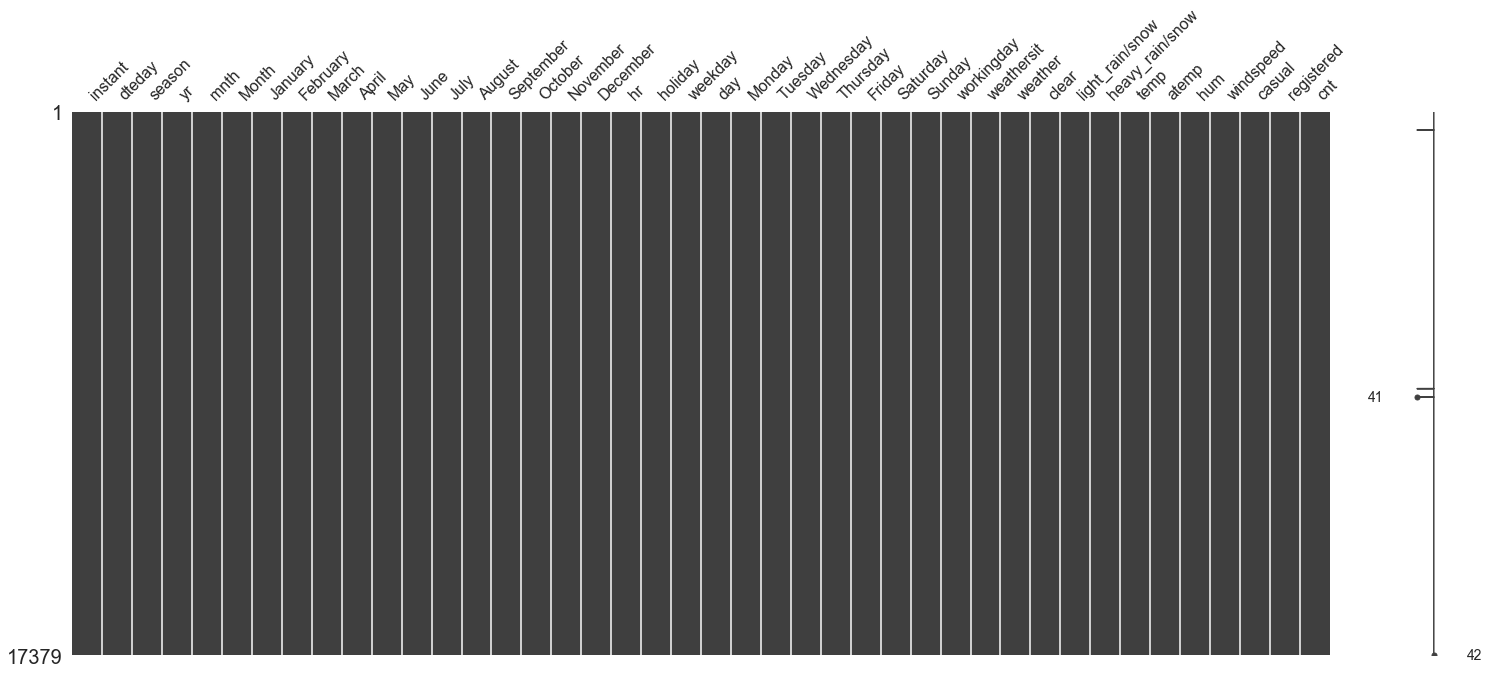

In [4]:
#Look for missing values using missigno
msno.matrix(data)
plt.savefig('missing_value_graph', dpi=300, bbox_inches='tight')

In [5]:
#Look for possible duplicate rows
print("the shape of the original data:", data.shape)
duplicate_rows_data = data[data.duplicated()]
print("number of duplicated rows:", duplicate_rows_data.shape)

the shape of the original data: (17379, 42)
number of duplicated rows: (0, 42)


In [6]:
#Removing Outliers, outside of three standard deviations
print("the shape of the original data:", data.shape)
data = data[np.abs(data["cnt"]-data["cnt"].mean())<=(3*data["cnt"].std())]
print("the shape of the data after removing outliers:", data.shape)
##Removed 244 outliers

the shape of the original data: (17379, 42)
the shape of the data after removing outliers: (17135, 42)


# Grouping and Looking for Trends

In [7]:
data.groupby(['Month','weather']).agg({'cnt':'sum','casual':'sum','registered': 'sum','temp': 'mean','hum': 'mean'})

cnt  casual  registered      temp       hum
Month     weather                                                       
April     Clear           192300   45971      146329  0.483952  0.512569
          Heavyrain/snow   12230    1491       10739  0.398732  0.823944
          lightrain/snow   55301   11997       43304  0.458710  0.691747
August    Clear           233355   51705      181650  0.711932  0.610625
          Heavyrain/snow   15095    3762       11333  0.672381  0.790119
          lightrain/snow   66464   12479       53985  0.699175  0.707285
December  Clear           120114   12727      107387  0.308053  0.605453
          Heavyrain/snow    8528     698        7830  0.364769  0.890231
          lightrain/snow   80892    8203       72689  0.338931  0.706565
February  Clear           105618   11196       94422  0.304362  0.489571
          Heavyrain/snow   10320     569        9751  0.292263  0.848394
          lightrain/snow   35414    3198       32216  0.292924  0.650263
January   Clear            92726    8843       83883  0.236000  0.510640
          Heavyrain/snow    5350     347        5003  0.247222  0.835463
          lightrain/snow   36634    2844       33790  0.239019  0.660748
July      Clear           252984   61505      191479  0.765682  0.572448
          Heavyrain/snow   10535    2463        8072  0.685667  0.768333
          lightrain/snow   55560   11500       44060  0.721508  0.686032
June      Clear           257704   58001      199703  0.686729  0.547111
          Heavyrain/snow    9913    1594        8319  0.643380  0.767465
          lightrain/snow   59826   12023       47803  0.680733  0.655934
March     Clear           147511   28587      118924  0.386749  0.514496
          Heavyrain/snow    9924    1389        8535  0.358605  0.727442
          lightrain/snow   61945   12714       49231  0.401409  0.701523
May       Clear           217752   53030      164722  0.605189  0.647297
          Heavyrain/snow   19771    3457       16314  0.557483  0.833636
          lightrain/snow   78145   16927       61218  0.579700  0.745075
November  Clear           176571   28455      148116  0.361336  0.587829
          Heavyrain/snow    9432     539        8893  0.400792  0.850297
          lightrain/snow   68828    7609       61219  0.380688  0.659180
October   Clear           176802   39423      137379  0.479691  0.643040
          Heavyrain/snow   21699    2583       19116  0.458405  0.851656
          lightrain/snow   84179   13706       70473  0.505879  0.731131
September Clear           201888   43762      158126  0.610539  0.669940
          Heavyrain/snow   19836    3321       16515  0.610417  0.876042
          lightrain/snow   81336   17985       63351  0.627174  0.769386

In [8]:
##Notice the casual use on the weekends, nearly doubles from within the week. 
data.groupby(by='day').agg({'cnt':'sum','casual':'sum','registered': 'sum'}).sort_values(by='cnt', ascending=False)

,cnt,casual,registered
day,,,
Saturday,473271,151896,321375
Friday,463008,74898,388110
Sunday,442494,140024,302470
Thursday,438548,56279,382269
Tuesday,426476,53300,373176
Wednesday,426144,52813,373331
Monday,422764,67401,355363


In [9]:
data.groupby(by='yr').agg({'cnt':'sum','casual':'sum','registered': 'sum'}).sort_values(by='yr', ascending=True)

,cnt,casual,registered
yr,,,
2011,1243103,247252,995851
2012,1849602,349359,1500243


In [10]:
data.groupby(by='weather').agg({'cnt':'sum','casual':'sum','registered': 'sum'}).sort_values(by='cnt', ascending=True)

,cnt,casual,registered
weather,,,
Heavyrain/snow,152633,22213,130420
lightrain/snow,764524,131185,633339
Clear,2175325,443205,1732120


# Visualizing Trends

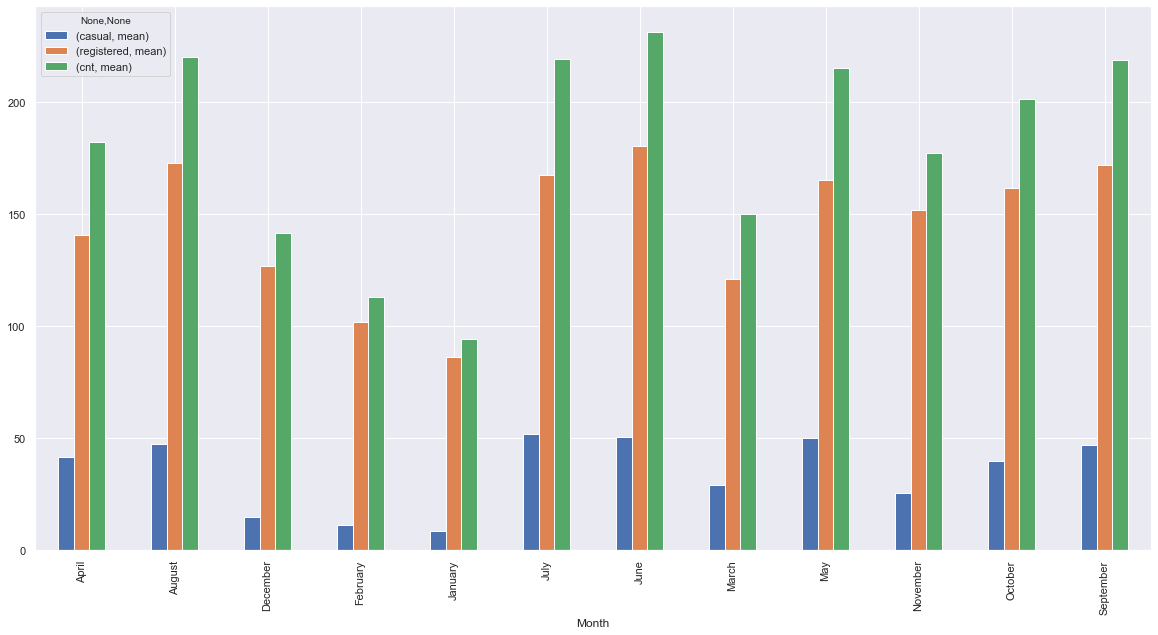

In [11]:
#Seasonal trend
bar_monthly=data.groupby('Month').agg(['mean']).reset_index()
bar_monthly.plot(x='Month', y=['casual','registered','cnt'],kind="bar",figsize=(20,10))
plt.show()

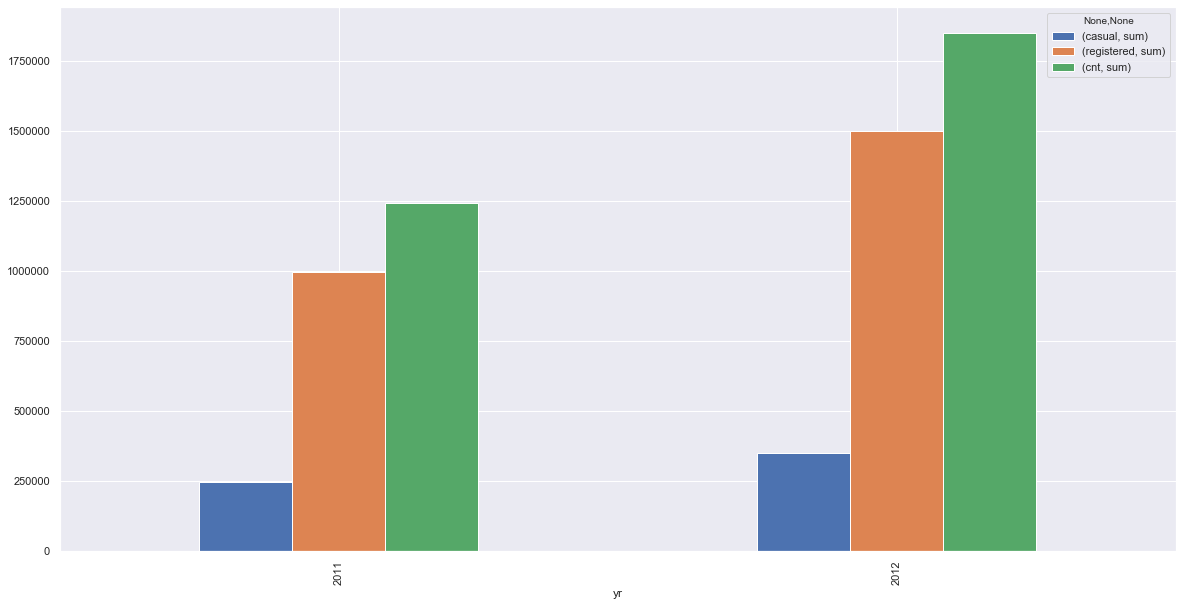

<Figure size 432x288 with 0 Axes>

In [12]:
#Seasonal trend
bar_monthly=data.groupby('yr').agg(['sum']).reset_index()
bar_monthly.plot(x='yr', y=['casual','registered','cnt'],kind="bar",figsize=(20,10))
plt.show()
plt.savefig('trial1.png', dpi=300, bbox_inches='tight')

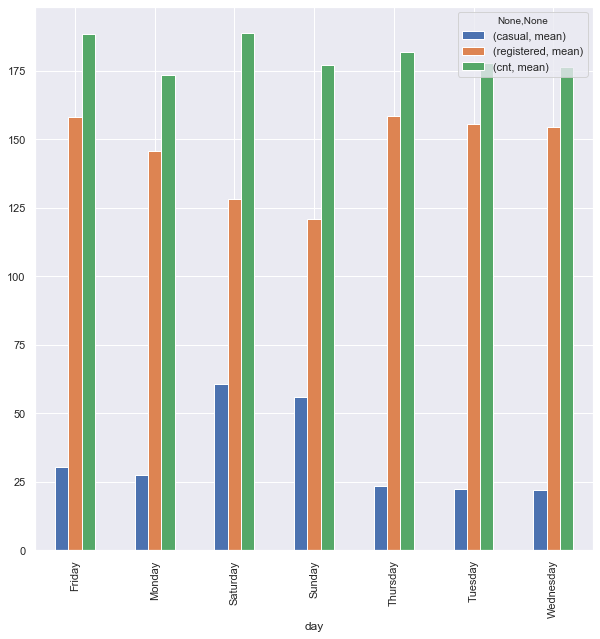

In [13]:
##Noticing the decrease in registered riders from weekdays-weekends, this points to the idea that most use these
##bikes to commute to work. 
bar_daily=data.groupby('day').agg(['mean']).reset_index()
bar_daily.plot(x='day', y=['casual','registered','cnt'],kind="bar", figsize=(10,10))
plt.show()

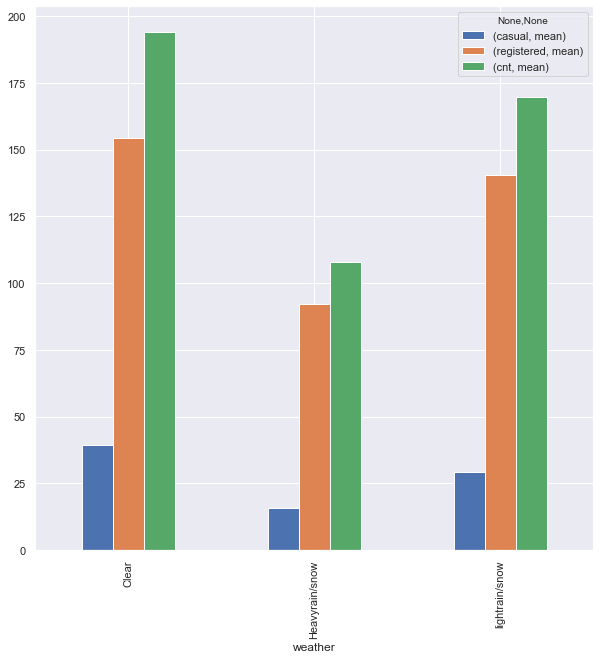

In [14]:
bar_weather=data.groupby('weather').agg(['mean']).reset_index()
bar_weather.plot(x='weather', y=['casual','registered','cnt'],kind="bar", figsize=(10,10))
plt.show()

[Text(0, 0.5, 'Avearage Total Users'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Average Users By Hour')]

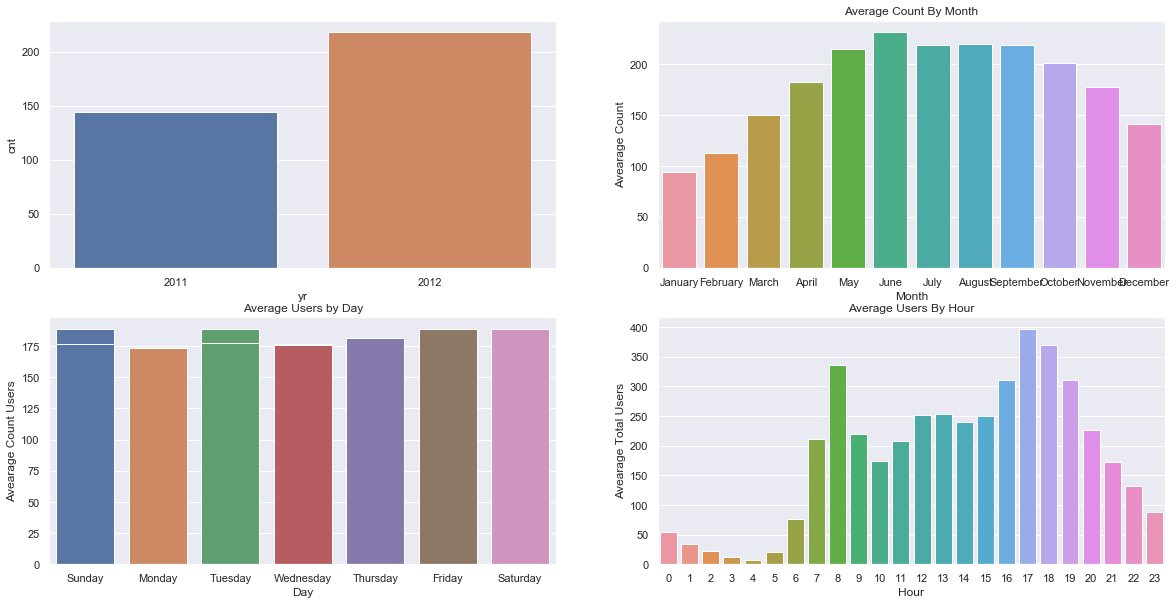

In [15]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sortOrder1 = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
#year count
fig = plt.figure(figsize=[20,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='yr',y='cnt',data=data.groupby('yr')['cnt'].mean().reset_index())

#month count
ax2 = fig.add_subplot(2,2,2)
monthAggregated = pd.DataFrame(data.groupby("Month")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
sns.barplot(data=monthSorted,x="Month",y="cnt",ax=ax2,order=sortOrder)
ax2.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

#day count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='cnt',data=data.groupby('day')['cnt'].mean().reset_index())
dayAggregated = pd.DataFrame(data.groupby("day")['cnt'].mean()).reset_index()
daySorted = dayAggregated.sort_values(by="cnt",ascending=False)
sns.barplot(data=daySorted,x="day",y="cnt",ax=ax3,order=sortOrder1)
ax3.set(xlabel='Day', ylabel='Avearage Count Users',title="Average Users by Day")

#hour count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hr',y='cnt',data=data.groupby('hr')['cnt'].mean().reset_index())
ax4.set(xlabel='Hour', ylabel='Avearage Total Users',title="Average Users By Hour")
#plt.savefig('summary_data.png', dpi=300, bbox_inches='tight')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

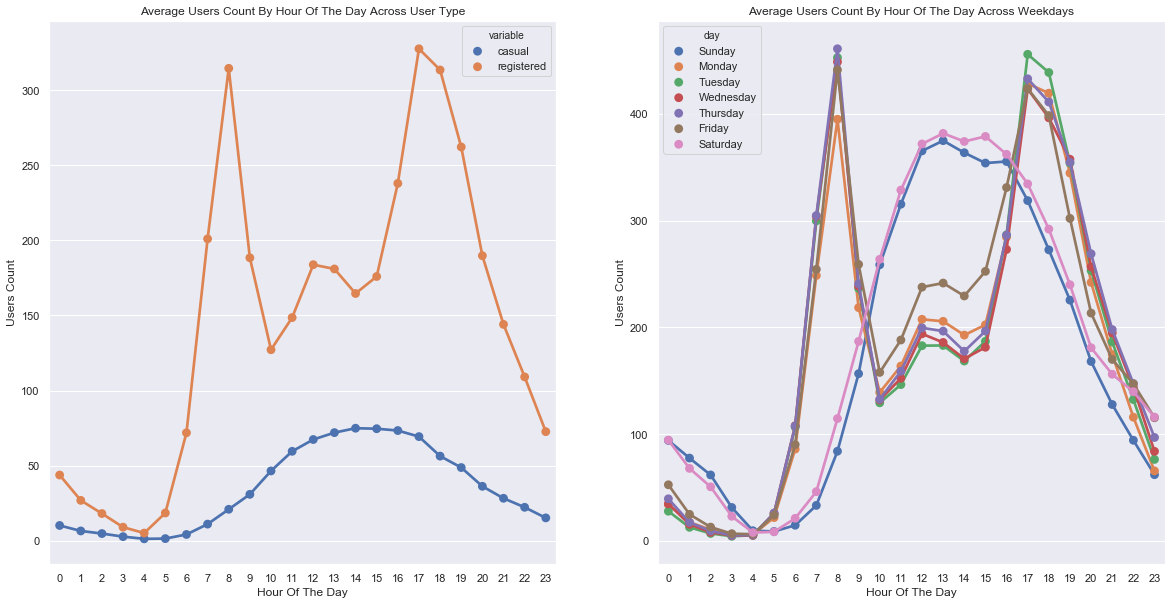

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,10)
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourTransformed = pd.melt(data[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

hourAggregated = pd.DataFrame(data.groupby(["hr","day"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["day"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
#plt.savefig('casual_vs_reg_hours2.png', dpi=300, bbox_inches='tight')

# Begin to look at continous variables characteristics and relationships

In [17]:
#To help eval correaltion, we are going to create a non-binary dataframe.. leaving out categorical variables.
non_bi_data = data.drop(['January','temp', 'February', 'March', 'April', 'May', 'June', 'July',
'August', 'September', 'October', 'November','December','Monday','hr','workingday','holiday',
                         'Month','day','Tuesday','instant', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday',
                        'weathersit', 'weather',
       'clear', 'light_rain/snow', 'heavy_rain/snow','dteday', 'season', 'yr', 'mnth','weekday','registered','casual'],axis=1)

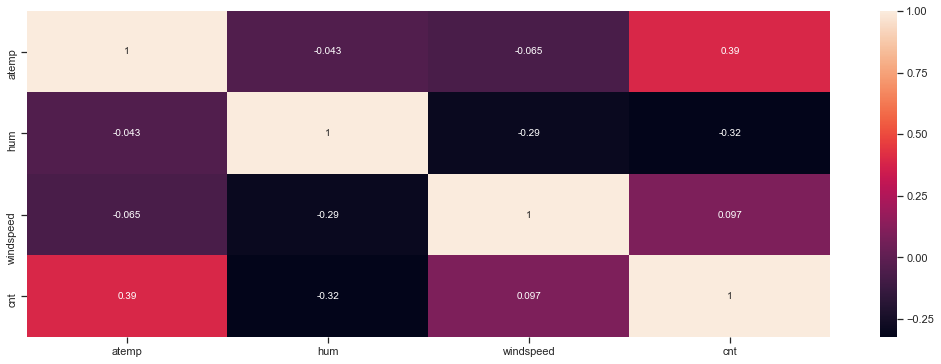

In [18]:
corr_num_data = non_bi_data.corr()
plt.figure(figsize=(18, 6))
sns.set_style('ticks')
sns.heatmap(corr_num_data, annot=True)
plt.show()

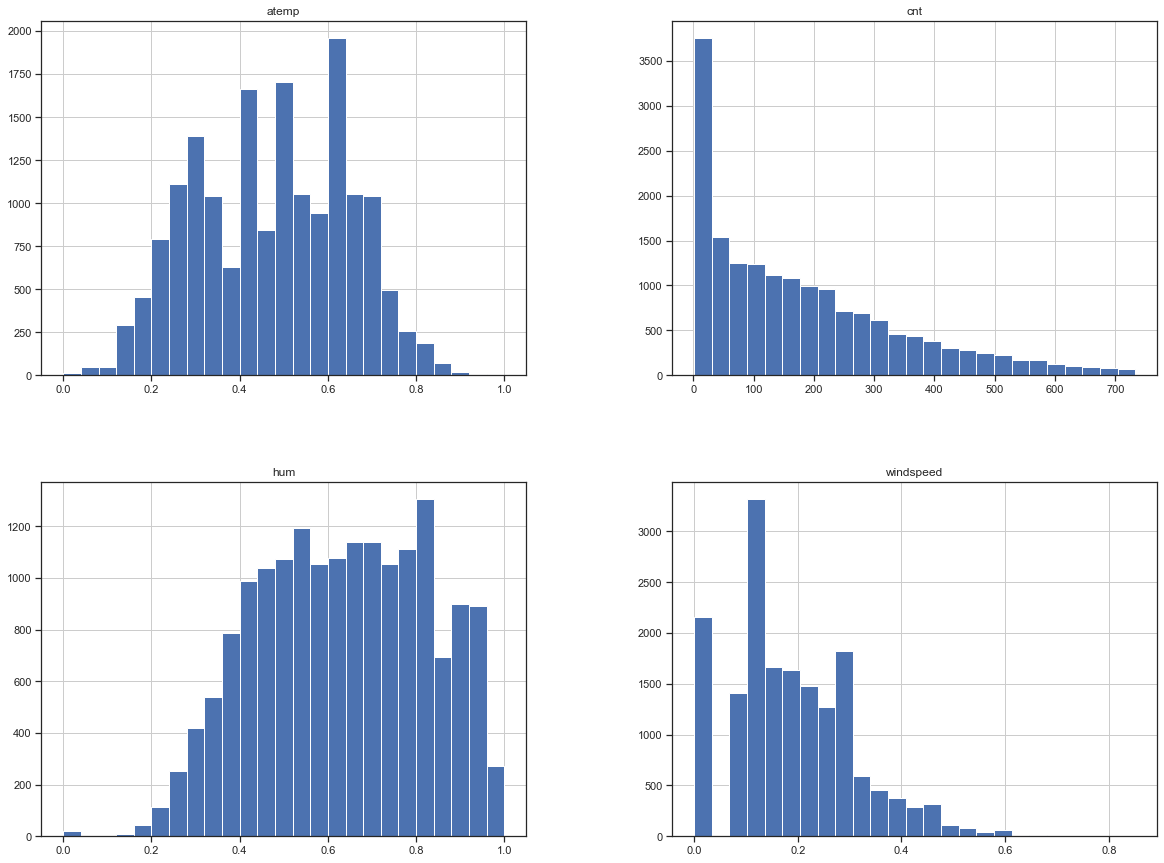

In [20]:
non_bi_data.hist(bins=25, figsize = (20,15))
plt.show()

# Building Models

In [23]:
data1 = data.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'Month', 'hr', 'holiday',
                  'weekday', 'day','workingday', 'weathersit', 'weather',
                  'temp'],axis=1)
standard_data = standardize(data1)
standard_data1 = standardize(data1)
#Total Users Model
X_train,X_test,y_train,y_test=train_test_split(standard_data.drop(['cnt','casual','registered'],axis=1),standard_data['cnt'],test_size=0.25,random_state=42)
#Casual Users Model
X_train_cas,X_test_cas,y_train_cas,y_test_cas=train_test_split(standard_data.drop(['cnt','casual','registered'],axis=1),standard_data['casual'],test_size=0.25,random_state=42)
#Registered Users Model
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(standard_data.drop(['cnt','casual','registered'],axis=1),standard_data['registered'],test_size=0.25,random_state=42)

# LASSO Model

Lasso penalization
Initially defined in 1996 by Tibshirani, lasso penalization boosts individual sparsity. It is defined as an L1 norm on the coefficients where parameter $\lambda$ controls the level of sparsity to be applied.

$$ \min R(\beta) + \lambda\sum_{i=1}^p|\beta_i|$$
It can be fit as,

penalization='lasso'
alpha = [0.05,.01]. This parameter is the $\lambda$ defined in the problem formulation. It controls the sparsity of the solution. Large $\lambda$ values are associated with more sparse solutions, since the coefficients are more heavily penalized.

courtesy of Álvaro Méndez Civieta via his ASGL library documentation 

In [28]:
alpha = .05
alpha1 = .01
lasso = Lasso(alpha=alpha,max_iter=10000,normalize=False)
lasso_cas = Lasso(alpha=alpha,max_iter=10000,normalize=False)
lasso_reg = Lasso(alpha=alpha,max_iter=10000,normalize=False)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
pred_train_lasso= lasso.predict(X_train)
y_pred_lasso_cas = lasso_cas.fit(X_train_cas, y_train_cas).predict(X_test_cas)
pred_train_lasso_cas= lasso_cas.predict(X_train_cas)
y_pred_lasso_reg = lasso_reg.fit(X_train_reg, y_train_reg).predict(X_test_reg)
pred_train_lasso_reg= lasso_reg.predict(X_train_reg)
#alpha = .01
lasso1 = Lasso(alpha=alpha1,max_iter=10000,normalize=False)
lasso_cas1 = Lasso(alpha=alpha1,max_iter=10000,normalize=False)
lasso_reg1 = Lasso(alpha=alpha1,max_iter=10000,normalize=False)
y_pred_lasso1 = lasso1.fit(X_train, y_train).predict(X_test)
pred_train_lasso1= lasso1.predict(X_train)
y_pred_lasso_cas1 = lasso_cas1.fit(X_train_cas, y_train_cas).predict(X_test_cas)
pred_train_lasso_cas1= lasso_cas1.predict(X_train_cas)
y_pred_lasso_reg1 = lasso_reg1.fit(X_train_reg, y_train_reg).predict(X_test_reg)
pred_train_lasso_reg1= lasso_reg1.predict(X_train_reg)

print("RMSE on Total Train data, alpha =.05:", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("r^2 on Total train data, alpha =.05:", r2_score(y_train, pred_train_lasso))
print("RMSE on Casual User Train data, alpha =.05:", np.sqrt(mean_squared_error(y_train_cas,pred_train_lasso_cas)))
print("r^2 on Casual User train data, alpha =.05:", r2_score(y_train_cas, pred_train_lasso_cas))
print("RMSE on Registered User Train data, alpha=.05:", np.sqrt(mean_squared_error(y_train_reg,pred_train_lasso_reg)))
print("r^2 on Registered User train data, alpha =.05:", r2_score(y_train_reg, pred_train_lasso_reg))
print('-----------------------------------------------------------------------------------------')
print("RMSE on Total Train data, alpha =.01:", np.sqrt(mean_squared_error(y_train,pred_train_lasso1)))
print("r^2 on Total train data, alpha =.01:", r2_score(y_train, pred_train_lasso1))
print("RMSE on Casual User Train data, alpha =.01:", np.sqrt(mean_squared_error(y_train_cas,pred_train_lasso_cas1)))
print("r^2 on Casual User train data, alpha =.01:", r2_score(y_train_cas, pred_train_lasso_cas1))
print("RMSE on Registered User Train data, alpha=.01:", np.sqrt(mean_squared_error(y_train_reg,pred_train_lasso_reg1)))
print("r^2 on Registered User train data, alpha =.01:", r2_score(y_train_reg, pred_train_lasso_reg1))
print('-----------------------------------------------------------------------------------------')

pred_test_lasso= lasso.predict(X_test)
pred_test_lasso_cas= lasso.predict(X_test_cas)
pred_test_lasso_reg= lasso.predict(X_test_reg)
#alpha = .01
pred_test_lasso1= lasso1.predict(X_test)
pred_test_lasso_cas1= lasso1.predict(X_test_cas)
pred_test_lasso_reg1= lasso1.predict(X_test_reg)

print("RMSE on Total test data, alpha=.05:",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("r^2 on Total test data, alpha= .05:",r2_score(y_test, pred_test_lasso))
print("RMSE on Casual User test data, alpha= .05:",np.sqrt(mean_squared_error(y_test_cas,pred_test_lasso_cas))) 
print("r^2 on Casual User test data, alpha= .05:",r2_score(y_test_cas, pred_test_lasso_cas))
print("RMSE on Registered User test data, alpha= .05:",np.sqrt(mean_squared_error(y_test_reg,pred_test_lasso_reg))) 
print("r^2 on Registered test data, alpha= .05:",r2_score(y_test_reg, pred_test_lasso_reg))
print('-----------------------------------------------------------------------------------------')
print("RMSE on Total test data, alpha=.01:",np.sqrt(mean_squared_error(y_test,pred_test_lasso1))) 
print("r^2 on Total test data, alpha=.01:",r2_score(y_test, pred_test_lasso1))
print("RMSE on Casual User test data, alpha=.01:",np.sqrt(mean_squared_error(y_test_cas,pred_test_lasso_cas1))) 
print("r^2 on Casual User test data, alpha=.01:",r2_score(y_test_cas, pred_test_lasso_cas1))
print("RMSE on Registered User test data, alpha=.01:",np.sqrt(mean_squared_error(y_test_reg,pred_test_lasso_reg1))) 
print("r^2 on Registered test data, alpha=.01:",r2_score(y_test_reg, pred_test_lasso_reg1))
print('-----------------------------------------------------------------------------------------')
#Lasso with 10 Cross Validation
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=False)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Optimal Alpha after 10 folds:", lassocv.alpha_)
pred_test_lasso_cv= lassocv.predict(X_test)
print("RMSE on Total User data with Cross-Fold Validation = ",np.sqrt(mean_squared_error(y_test, lassocv.predict(X_test))))
print("r^2 on Total User data with Cross-Fold Validation:",r2_score(y_test, pred_test_lasso_cv))


RMSE on Total Train data, alpha =.05: 0.859030107280848
r^2 on Total train data, alpha =.05: 0.25571000175434155
RMSE on Casual User Train data, alpha =.05: 0.7743690044877194
r^2 on Casual User train data, alpha =.05: 0.3994461140017469
RMSE on Registered User Train data, alpha=.05: 0.9006890453930814
r^2 on Registered User train data, alpha =.05: 0.17845728506442105
-----------------------------------------------------------------------------------------
RMSE on Total Train data, alpha =.01: 0.8384252132208426
r^2 on Total train data, alpha =.01: 0.2909872052472434
RMSE on Casual User Train data, alpha =.01: 0.7469551578705784
r^2 on Casual User train data, alpha =.01: 0.4412145102758289
RMSE on Registered User Train data, alpha=.01: 0.8802184489102169
r^2 on Registered User train data, alpha =.01: 0.21537648207148952
-----------------------------------------------------------------------------------------
RMSE on Total test data, alpha=.05: 0.8793834400822731
r^2 on Total test data,

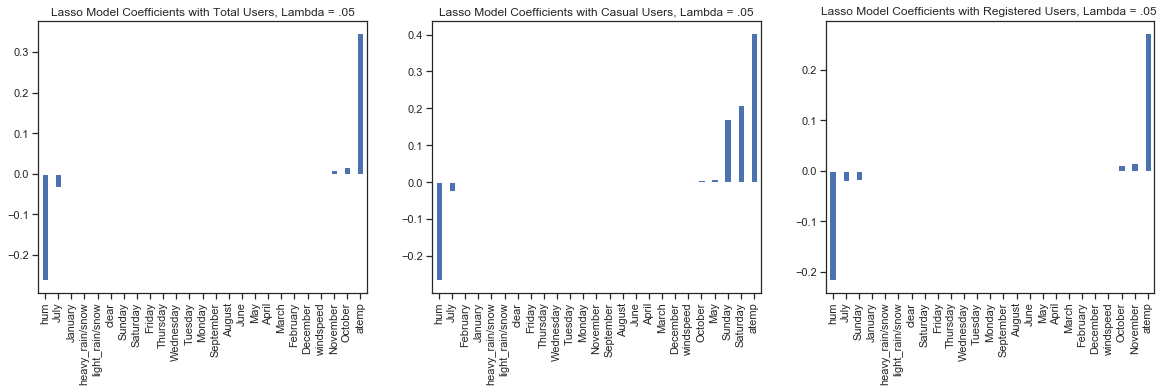

In [29]:
#checking the magnitude of coefficients
from pandas import Series
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
#fig,((ax1, ax2,ax3),(ax4, ax5,ax6))=plt.subplots(2,3)
#fig, axs = plt.subplots(2, 3,)
fig.set_size_inches(20, 5)
predictors = X_test.columns
coef = Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Lasso Model Coefficients with Total Users, Lambda = .05', ax=ax1)

predictors_cas = X_test_cas.columns
coef_cas = Series(lasso_cas.coef_,predictors_cas).sort_values()
coef_cas.plot(kind='bar', title='Lasso Model Coefficients with Casual Users, Lambda = .05', ax=ax2)

predictors_reg = X_test_reg.columns
coef_reg = Series(lasso_reg.coef_,predictors_reg).sort_values()
coef_reg.plot(kind='bar', title='Lasso Model Coefficients with Registered Users, Lambda = .05 ', ax=ax3)
plt.savefig('Final_Coefs_take2', dpi=300, bbox_inches='tight')


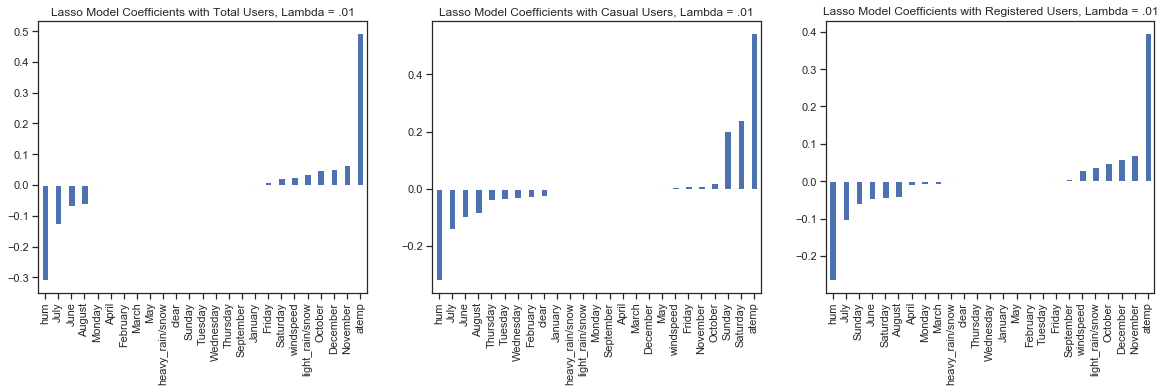

In [30]:
fig,(ax4,ax5,ax6) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

coef1 = Series(lasso1.coef_,predictors).sort_values()
coef1.plot(kind='bar', title='Lasso Model Coefficients with Total Users, Lambda = .01', ax=ax4)


coef_cas1 = Series(lasso_cas1.coef_,predictors_cas).sort_values()
coef_cas1.plot(kind='bar', title='Lasso Model Coefficients with Casual Users, Lambda = .01', ax=ax5)


coef_reg1 = Series(lasso_reg1.coef_,predictors_reg).sort_values()
coef_reg1.plot(kind='bar', title='Lasso Model Coefficients with Registered Users, Lambda = .01', ax=ax6)
plt.savefig('Coefs_lambda=1_lasso', dpi=300, bbox_inches='tight')

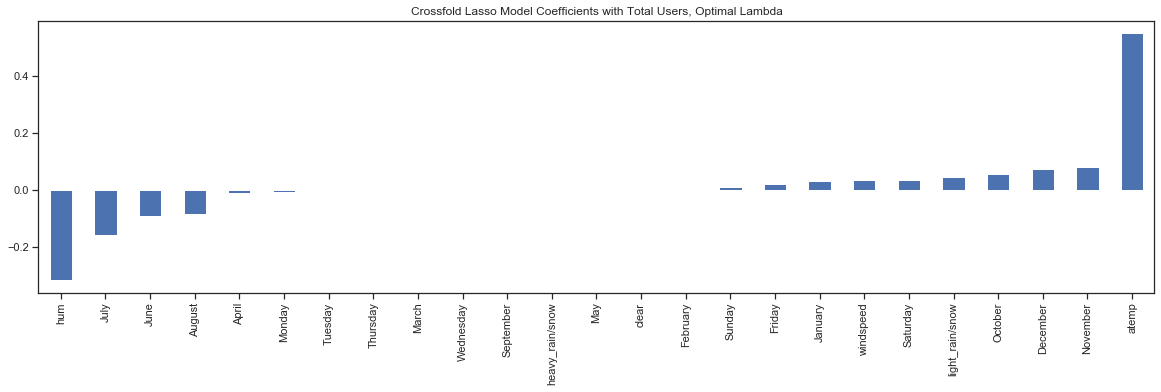

In [31]:
fig,(ax) = plt.subplots(ncols=1)
fig.set_size_inches(20, 5)

coef2 = Series(lassocv.coef_,predictors).sort_values()
coef2.plot(kind='bar', title='Crossfold Lasso Model Coefficients with Total Users, Optimal Lambda', ax=ax)


# Ridge Model

Ridge regression minimizes squared error while regularizing the norm of the weights:
$$ \min R(\beta) + \lambda\sum_{i=1}^p(\beta_i)^2$$


In [32]:
rr = Ridge(alpha=0.5,normalize=False)
rr_cas = Ridge(alpha=0.5,normalize=False)
rr_reg = Ridge(alpha=0.5,normalize=False)
y_pred_rr = rr.fit(X_train, y_train).predict(X_test)
pred_train_rr= rr.predict(X_train)
y_pred_rr_cas = rr_cas.fit(X_train_cas, y_train_cas).predict(X_test_cas)
pred_train_rr_cas= rr_cas.predict(X_train_cas)
y_pred_rr_reg = rr_reg.fit(X_train_reg, y_train_reg).predict(X_test_reg)
pred_train_rr_reg= rr_reg.predict(X_train_reg)
#alpha = .01
rr1 = Ridge(alpha=0.01,normalize=False)
rr_cas1 = Ridge(alpha=0.01,normalize=False)
rr_reg1 = Ridge(alpha=0.01,normalize=False)
y_pred_rr1 = rr1.fit(X_train, y_train).predict(X_test)
pred_train_rr1= rr1.predict(X_train)
y_pred_rr_cas1 = rr_cas1.fit(X_train_cas, y_train_cas).predict(X_test_cas)
pred_train_rr_cas1= rr_cas1.predict(X_train_cas)
y_pred_rr_reg1 = rr_reg1.fit(X_train_reg, y_train_reg).predict(X_test_reg)
pred_train_rr_reg1= rr_reg1.predict(X_train_reg)

print("RMSE on Total Train data, alpha =.05:", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("r^2 on Total train data, alpha =.05:", r2_score(y_train, pred_train_rr))
print("RMSE on Casual User Train data, alpha =.05:", np.sqrt(mean_squared_error(y_train_cas,pred_train_rr_cas)))
print("r^2 on Casual User train data, alpha =.05:", r2_score(y_train_cas, pred_train_rr_cas))
print("RMSE on Registered User Train data, alpha=.05:", np.sqrt(mean_squared_error(y_train_reg,pred_train_rr_reg)))
print("r^2 on Registered User train data, alpha =.05:", r2_score(y_train_reg, pred_train_rr_reg))
print('-----------------------------------------------------------------------------------------')
print("RMSE on Total Train data, alpha =.01:", np.sqrt(mean_squared_error(y_train,pred_train_rr1)))
print("r^2 on Total train data, alpha =.01:", r2_score(y_train, pred_train_rr1))
print("RMSE on Casual User Train data, alpha =.01:", np.sqrt(mean_squared_error(y_train_cas,pred_train_rr_cas1)))
print("r^2 on Casual User train data, alpha =.01:", r2_score(y_train_cas, pred_train_rr_cas1))
print("RMSE on Registered User Train data, alpha=.01:", np.sqrt(mean_squared_error(y_train_reg,pred_train_rr_reg1)))
print("r^2 on Registered User train data, alpha =.01:", r2_score(y_train_reg, pred_train_rr_reg1))
print('-----------------------------------------------------------------------------------------')

pred_test_rr= rr.predict(X_test)
pred_test_rr_cas= rr.predict(X_test_cas)
pred_test_rr_reg= rr.predict(X_test_reg)
#alpha = .01
pred_test_rr1= rr1.predict(X_test)
pred_test_rr1_cas1= rr1.predict(X_test_cas)
pred_test_rr1_reg1= rr1.predict(X_test_reg)

print("RMSE on Total test data, alpha=.05:",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("r^2 on Total test data, alpha= .05:",r2_score(y_test, pred_test_rr))
print("RMSE on Casual User test data, alpha= .05:",np.sqrt(mean_squared_error(y_test_cas,pred_test_rr_cas))) 
print("r^2 on Casual User test data, alpha= .05:",r2_score(y_test_cas, pred_test_rr_cas))
print("RMSE on Registered User test data, alpha= .05:",np.sqrt(mean_squared_error(y_test_reg,pred_test_rr_reg))) 
print("r^2 on Registered test data, alpha= .05:",r2_score(y_test_reg, pred_test_rr_reg))
print('-----------------------------------------------------------------------------------------')
print("RMSE on Total test data, alpha=.01:",np.sqrt(mean_squared_error(y_test,pred_test_rr1))) 
print("r^2 on Total test data, alpha=.01:",r2_score(y_test, pred_test_rr1))
print("RMSE on Casual User test data, alpha=.01:",np.sqrt(mean_squared_error(y_test_cas,pred_test_rr1_cas1))) 
print("r^2 on Casual User test data, alpha=.01:",r2_score(y_test_cas, pred_test_rr1_cas1))
print("RMSE on Registered User test data, alpha=.01:",np.sqrt(mean_squared_error(y_test_reg,pred_test_rr1_reg1))) 
print("r^2 on Registered test data, alpha=.01:",r2_score(y_test_reg, pred_test_rr1_reg1))
print('-----------------------------------------------------------------------------------------')

RMSE on Total Train data, alpha =.05: 0.836435323703281
r^2 on Total train data, alpha =.05: 0.2943487045581481
RMSE on Casual User Train data, alpha =.05: 0.7447649732623342
r^2 on Casual User train data, alpha =.05: 0.44448659192574147
RMSE on Registered User Train data, alpha=.05: 0.8783358647796076
r^2 on Registered User train data, alpha =.05: 0.2187291502097548
-----------------------------------------------------------------------------------------
RMSE on Total Train data, alpha =.01: 0.836435109034164
r^2 on Total train data, alpha =.01: 0.2943490667655222
RMSE on Casual User Train data, alpha =.01: 0.7447634574159794
r^2 on Casual User train data, alpha =.01: 0.4444888532354109
RMSE on Registered User Train data, alpha=.01: 0.8783358427837226
r^2 on Registered User train data, alpha =.01: 0.21872918933998797
-----------------------------------------------------------------------------------------
RMSE on Total test data, alpha=.05: 0.8618965480184992
r^2 on Total test data, a

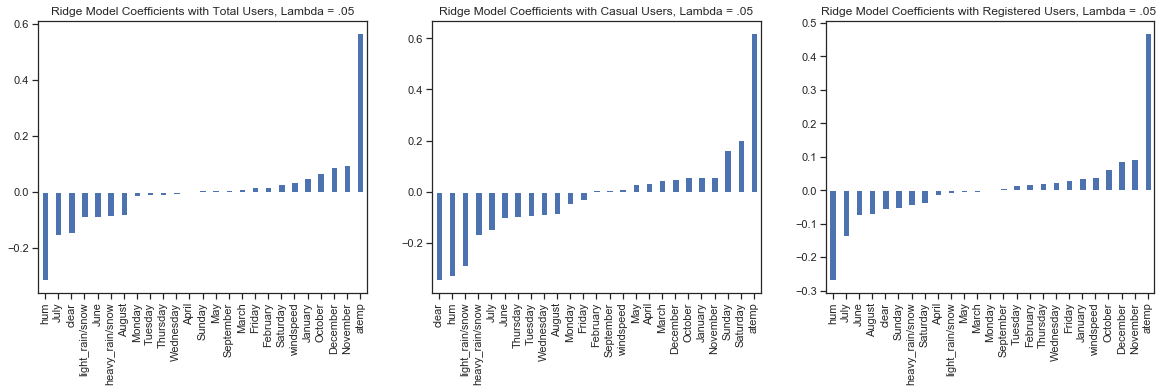

In [33]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
predictors = X_test.columns
coefrr = Series(rr.coef_,predictors).sort_values()
coefrr.plot(kind='bar', title='Ridge Model Coefficients with Total Users, Lambda = .05', ax=ax1)

predictors_cas = X_test_cas.columns
coef_cas_rr = Series(rr_cas.coef_,predictors_cas).sort_values()
coef_cas_rr.plot(kind='bar', title='Ridge Model Coefficients with Casual Users, Lambda = .05', ax=ax2)

predictors_reg = X_test_reg.columns
coef_reg_rr = Series(rr_reg.coef_,predictors_reg).sort_values()
coef_reg_rr.plot(kind='bar', title='Ridge Model Coefficients with Registered Users, Lambda = .05 ', ax=ax3)
plt.savefig('ridge_Coefs_take1', dpi=300, bbox_inches='tight')

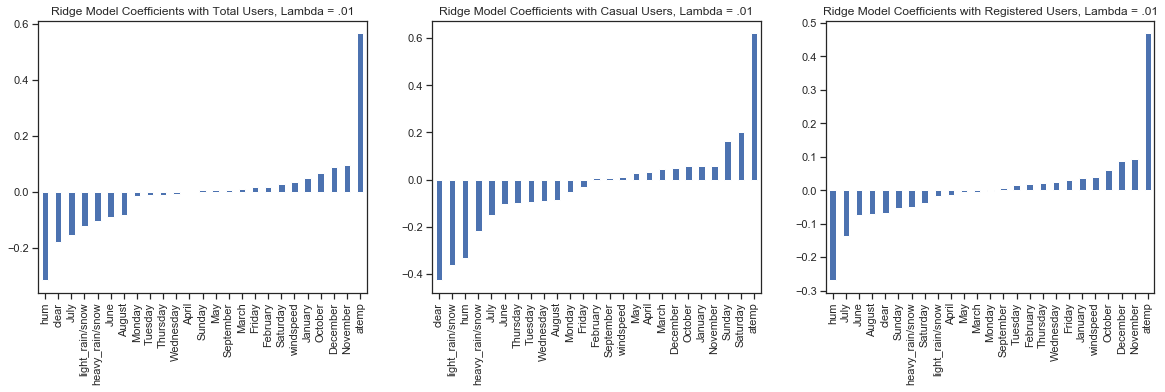

In [34]:
fig,(ax4,ax5,ax6) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

coefrr1 = Series(rr1.coef_,predictors).sort_values()
coefrr1.plot(kind='bar', title='Ridge Model Coefficients with Total Users, Lambda = .01', ax=ax4)


coef_rr1_cas = Series(rr_cas1.coef_,predictors_cas).sort_values()
coef_rr1_cas.plot(kind='bar', title='Ridge Model Coefficients with Casual Users, Lambda = .01', ax=ax5)


coef_rr1_reg = Series(rr_reg1.coef_,predictors_reg).sort_values()
coef_rr1_reg.plot(kind='bar', title='Ridge Model Coefficients with Registered Users, Lambda = .01', ax=ax6)
plt.savefig('Coefs_lambda=2_rr', dpi=300, bbox_inches='tight')

# Group Lasso

Group lasso penalization
Proposed in 2006 by Yuan and Li, group lasso penalization works assuming that predictors from matrix $X$ have a natural grouped structure. The penalization is defined as,

$$ \min R(\beta) +\lambda \sum_{l=1}^{K} \sqrt{p_{l}}\left\|\beta^{(l)}\right\|_{2}$$
where $p_{l}$ is the size of the l-th group. This penalization can be fit by simply defining:

penalization='gl' where gl refers to group lasso
lambda1 = lambda1 = [0.001, 0.01, 0.05, .075], where $\lambda$ is the parameter defined in the lasso penalization
group_index = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 6]). This should be an array of the same length as the number of variables in matrix $X$. Each element on this array indicates the group at which the associated variable belongs. In this case, the first 12 "1s" are group by the months of the year, the next 7 "2s" are grouped by days of the week, the next three "3s" are defined by the type of weather, (clear, light_rain/mist, heavy_rain/snow), and 4,5,6 and the three individual continous variables (temperature,humidity,windspeed).

courtesy of Álvaro Méndez Civieta via his ASGL library documentation

In [35]:
#In order for ASGL library to interpret data, must be in numpy array, therefore we must recreate training and testing
##sets, and ensure they are of the same dimensions moving forward with the Grouped Lasso model
X_train1,X_test1,y_train1,y_test1=train_test_split(standard_data1.drop(['cnt','casual','registered'],axis=1),standard_data1['cnt'],test_size=0.25,random_state=42)
X_train1_cas,X_test1_cas,y_train1_cas,y_test1_cas=train_test_split(standard_data1.drop(['cnt','casual','registered'],axis=1),standard_data1['casual'],test_size=0.25,random_state=42)
X_train1_reg,X_test1_reg,y_train1_reg,y_test1_reg=train_test_split(standard_data1.drop(['cnt','casual','registered'],axis=1),standard_data1['registered'],test_size=0.25,random_state=42)
X_train2 = X_train1.to_numpy()
y_train2 = y_train1.to_numpy()
X_test2 = X_test1.to_numpy()
y_test2 = y_test1.to_numpy()
X_train2_cas = X_train1_cas.to_numpy()
y_train2_cas = y_train1_cas.to_numpy()
X_test2_cas = X_test1_cas.to_numpy()
y_test2_cas = y_test1_cas.to_numpy()
X_train2_reg = X_train1_reg.to_numpy()
y_train2_reg = y_train1_reg.to_numpy()
X_test2_reg = X_test1_reg.to_numpy()
y_test2_reg = y_test1_reg.to_numpy()
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)
print(X_train2_cas.shape)
print(y_train2_cas.shape)
print(X_test2_cas.shape)
print(y_test2_cas.shape)
print(X_train2_reg.shape)
print(y_train2_reg.shape)
print(X_test2_reg.shape)
print(y_test2_reg.shape)

(12851, 25)
(12851,)
(4284, 25)
(4284,)
(12851, 25)
(12851,)
(4284, 25)
(4284,)
(12851, 25)
(12851,)
(4284, 25)
(4284,)


In [36]:
#Assessing the model coefficents over the below variations, the group lasso elects to remove the "days of the week 
#group 2 from the model at a threshold of .05 penalty term"
lambda1 = [0.001, 0.01, 0.05, .06]
group_index = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 6])
group_lasso_model = asgl.ASGL(model='lm', penalization='gl',lambda1=lambda1)
group_lasso_model.fit(x=X_train2, y=y_train2, group_index=group_index)
coef = group_lasso_model.coef_
coef

[array([-0.0038043 ,  0.04450375,  0.01486819,  0.00866571, -0.00254722,
         0.00610765, -0.08817187, -0.15322303, -0.08096   ,  0.00785688,
         0.06666437,  0.09214028,  0.0844251 , -0.01551011, -0.01345448,
        -0.00754203, -0.01029423,  0.01420065,  0.0278623 ,  0.00417989,
        -0.02004261,  0.02641111, -0.01149431,  0.55985334, -0.31717256,
         0.03484457]),
 array([-0.00384152,  0.02398497,  0.00124735,  0.00120645, -0.00324632,
         0.01246362, -0.06995987, -0.12554007, -0.06241477,  0.01528094,
         0.06206302,  0.07751444,  0.06753634, -0.01090307, -0.00907384,
        -0.00515979, -0.0069093 ,  0.0098555 ,  0.01950451,  0.00230598,
        -0.01703372,  0.02422335, -0.00965357,  0.50887748, -0.31662127,
         0.03174093]),
 array([-0.00365264, -0.0090886 , -0.01471902, -0.00738181, -0.00202501,
         0.01473441, -0.02086751, -0.04439451, -0.01670737,  0.01698571,
         0.03223169,  0.03016808,  0.02092799,  0.        ,  0.        ,
     

In [37]:
lambda1 = [0.001, 0.01, 0.05, .06]
group_index = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 6])
group_lasso_model_cas = asgl.ASGL(model='lm', penalization='gl',lambda1=lambda1)
group_lasso_model_cas.fit(x=X_train2_cas, y=y_train2_cas, group_index=group_index)
coef_cas = group_lasso_model_cas.coef_
coef_cas

[array([-0.00195639,  0.05377428,  0.00574407,  0.0424548 ,  0.03366557,
         0.02948251, -0.09932784, -0.1468224 , -0.0859825 ,  0.00884664,
         0.05552002,  0.05674689,  0.04593035, -0.05037092, -0.09469867,
        -0.09158546, -0.09826213, -0.03222709,  0.2001337 ,  0.16181086,
        -0.0232421 ,  0.00968135,  0.0150875 ,  0.61400429, -0.32947823,
         0.00953076]),
 array([-0.00191394,  0.03285746, -0.00690824,  0.03260573,  0.03044317,
         0.03404052, -0.08021943, -0.11930609, -0.06713618,  0.01603906,
         0.05156607,  0.04430912,  0.03157803, -0.04828936, -0.09051491,
        -0.08786755, -0.09422503, -0.03188905,  0.19236569,  0.15543084,
        -0.01711339,  0.01082871,  0.01162197,  0.56358995, -0.32616803,
         0.00835337]),
 array([-1.37997962e-03, -3.03374193e-03, -1.75228178e-02,  8.96038832e-03,
         1.52926474e-02,  2.46951517e-02, -2.59813565e-02, -4.01348074e-02,
        -1.95517207e-02,  1.65968628e-02,  2.58638478e-02,  1.20831930e-

In [38]:
lambda1 = [0.001, 0.01, 0.0153, .0154]
group_index = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 6])
group_lasso_model_reg = asgl.ASGL(model='lm', penalization='gl',lambda1=lambda1)
group_lasso_model_reg.fit(x=X_train2_reg, y=y_train2_reg, group_index=group_index)
coef_reg = group_lasso_model_reg.coef_
coef_reg

[array([-0.00395343,  0.03495255,  0.01603269, -0.0046455 , -0.01519296,
        -0.0030232 , -0.0720091 , -0.13443971, -0.06794718,  0.00643212,
         0.06150841,  0.09218847,  0.08653326, -0.00135393,  0.01691329,
         0.02312833,  0.02211314,  0.02903902, -0.03645592, -0.05223096,
        -0.0162272 ,  0.02885833, -0.01952283,  0.46380797, -0.26945856,
         0.03911559]),
 array([-0.00405186,  0.01629352,  0.00345893, -0.0102179 , -0.01489846,
         0.00366339, -0.0554568 , -0.10888668, -0.05067991,  0.01276643,
         0.05662665,  0.07802208,  0.06950924, -0.00068217,  0.01548426,
         0.02034184,  0.02003092,  0.02484092, -0.03258657, -0.046396  ,
        -0.01479934,  0.02617456, -0.01643703,  0.41713651, -0.26900677,
         0.03517395]),
 array([-0.00409037,  0.00800297, -0.0019223 , -0.01230422, -0.01438431,
         0.00640604, -0.04714459, -0.09565328, -0.04223008,  0.01507779,
         0.05327883,  0.07030202,  0.06068726, -0.00039647,  0.01452007,
     